In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
data1 = pd.read_csv("heart.csv")

In [3]:
#the hardcoding, specifically selecting hypertensive patients BP 130 and more for all ages dataset 1

hypertension_patients = []
# for i,row in data1.iterrows():
#     if data1.loc[i, "RestingBP"] >= 130:
#         hypertension_patients.append(row)

for i,row in data1.iterrows():
    hypertension_patients.append(row)

htd_patients1 = pd.DataFrame(hypertension_patients, columns=['Age', 'Sex', 
     'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 
     'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',  'HeartDisease'])


removing tuples with absurd values (like 0 BP)

In [4]:
data1=data1[(data1['RestingBP'] != 0) & (data1['Cholesterol'] != 0)]

In [5]:
data1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


htd_patients1 is now the new data frame exclusively containing hypertension patients from heart.csv

In [6]:
htd_patients1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


In [7]:
htd_patients1 = pd.get_dummies(htd_patients1, columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [8]:
X1 = htd_patients1 [['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']]
Y1 = htd_patients1 [['HeartDisease']]

Note : allocator defines how many rows at then end to separate for validation purposes

In [9]:
allocator = 100
X_train, X_valid = X1[:-allocator], X1[-allocator:]
Y_train, Y_valid = Y1[:-allocator], Y1[-allocator:]

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(21, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [11]:
model.compile(loss="BinaryCrossentropy",
optimizer="adam",
metrics=["accuracy"])

In [12]:
history = model.fit(X_train, Y_train, epochs = 443,validation_data=(X_valid,Y_valid))

Epoch 1/443
26/26 [==============================] - 3s 20ms/step - loss: 1.3981 - accuracy: 0.5990 - val_loss: 0.7461 - val_accuracy: 0.6300
Epoch 2/443
26/26 [==============================] - 0s 6ms/step - loss: 0.6398 - accuracy: 0.6687 - val_loss: 0.6865 - val_accuracy: 0.6400
Epoch 3/443
26/26 [==============================] - 0s 5ms/step - loss: 0.5734 - accuracy: 0.7139 - val_loss: 0.5952 - val_accuracy: 0.6800
Epoch 4/443
26/26 [==============================] - 0s 7ms/step - loss: 0.5569 - accuracy: 0.7237 - val_loss: 0.6090 - val_accuracy: 0.6300
Epoch 5/443
26/26 [==============================] - 0s 5ms/step - loss: 0.5538 - accuracy: 0.7237 - val_loss: 0.6072 - val_accuracy: 0.6800
Epoch 6/443
26/26 [==============================] - 0s 5ms/step - loss: 0.5326 - accuracy: 0.7359 - val_loss: 0.6230 - val_accuracy: 0.7100
Epoch 7/443
26/26 [==============================] - 0s 5ms/step - loss: 0.5196 - accuracy: 0.7421 - val_loss: 0.5265 - val_accuracy: 0.7400
Epoch 8/443


Learning CURVES

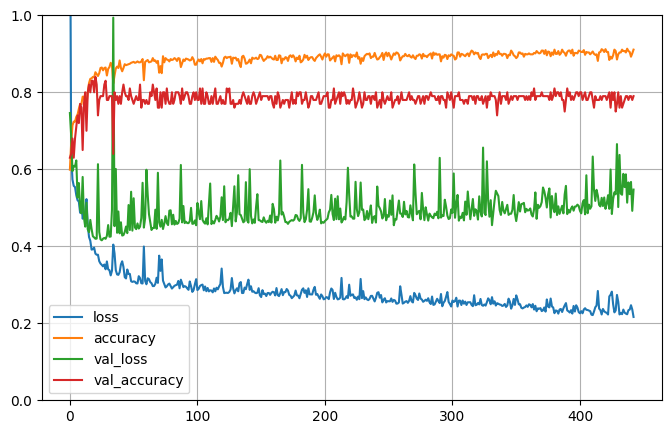

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
X_train.head(4)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0


In [15]:
# Age	= 40
# RestingBP =	140
# Cholesterol	= 289
# FastingBS = 0
# MaxHR = 172
# Oldpeak = 0.0
# Sex_F = 0
# Sex_M = 1
# ChestPainType_ASY = 0
# ChestPainType_ATA = 1
# ChestPainType_NAP = 0
# ChestPainType_TA = 0
# RestingECG_LVH = 0
# RestingECG_Normal = 1
# RestingECG_ST = 0
# ExerciseAngina_N = 1
# ExerciseAngina_Y = 0
# ST_Slope_Down = 0
# ST_Slope_Flat = 0
# ST_Slope_Up = 1

In [16]:
# new_patient = pd.DataFrame({"Age":[Age],"RestingBP":[RestingBP],"Cholesterol":[Cholesterol],"FastingBS":[FastingBS],"MaxHR":[MaxHR],"Oldpeak":[Oldpeak],"Sex_F":[Sex_F],"Sex_M":[Sex_M],"ChestPainType_ASY":[ChestPainType_ASY],"ChestPainType_ATA":[ChestPainType_ATA],"ChestPainType_NAP":[ChestPainType_NAP],"ChestPainType_TA":[ChestPainType_TA],"RestingECG_LVH":[RestingECG_LVH],"RestingECG_Normal":[RestingECG_Normal],"RestingECG_ST":[RestingECG_ST],"ExerciseAngina_N":[ExerciseAngina_N],"ExerciseAngina_Y":[ExerciseAngina_Y],"ST_Slope_Down":[ST_Slope_Down],"ST_Slope_Flat":[ST_Slope_Flat],"ST_Slope_Up":[ST_Slope_Up]})
# float(model.predict(new_patient))

In [19]:
model.save('keras_model')

INFO:tensorflow:Assets written to: keras_model\assets


INFO:tensorflow:Assets written to: keras_model\assets
